<a href="https://colab.research.google.com/github/someDeveloperDH/game/blob/Vlolet/RSP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2024-1학기 딥러닝 - 기말 팀 프로젝트
## **가위 바위 보 분류하기(RPS Classification)**
   

T1 (박동혁, 이유준, 배도현)

###1. 1차 모델

#### 1-1. 학습 준비

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from random import shuffle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Data 경로 설정

In [3]:
# 필요시 경로 수정 필수
base_dir = "/content/drive/MyDrive/Colab Notebooks/myRPS/RPS"

train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"test")

train_paper_dir = os.path.join(train_dir,"paper") # 각 650개
train_rock_dir = os.path.join(train_dir,"rock")
train_scissors_dir = os.path.join(train_dir,"scissors")

test_paper_dir = os.path.join(test_dir,"paper") # 각 90개
test_rock_dir = os.path.join(test_dir,"rock")
test_scissors_dir = os.path.join(test_dir,"scissors")

#### 1-2. Data 전처리

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

print(train_datagen)

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    subset='training',  # subset 미설정 시 분리되지 않음
                                                    batch_size=16,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    target_size=(224,224))
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                         subset='validation',
                                                              batch_size=4,
                                                              color_mode='rgb',
                                                              class_mode='categorical',
                                                              target_size=(224,224))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  target_size=(224,224))
print(f"훈련 이미지 개수: {train_generator.samples}")
print(f"검증 이미지 개수: {validation_generator.samples}")
print(f"테스트 이미지 개수: {test_generator.samples}")

Found 1365 images belonging to 3 classes.
Found 585 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
훈련 이미지 개수: 1365
검증 이미지 개수: 585
테스트 이미지 개수: 270


In [6]:
# 폴더기준으로 자동으로 클래스 나눈거 확인
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

#### 1-3. 모델 생성

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics= ['accuracy'])


#### 1-4. 모델 학습

In [9]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=10,
                              epochs=100,
                              validation_steps=10,
                              verbose=2)

<ipython-input-9-1e5eb6015191>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
10/10 - 61s - loss: 1.3715 - accuracy: 0.3063 - val_loss: 1.0999 - val_accuracy: 0.3250 - 61s/epoch - 6s/step
Epoch 2/100
10/10 - 60s - loss: 1.0984 - accuracy: 0.3750 - val_loss: 1.0945 - val_accuracy: 0.4000 - 60s/epoch - 6s/step
Epoch 3/100
10/10 - 38s - loss: 1.1001 - accuracy: 0.3063 - val_loss: 1.0948 - val_accuracy: 0.3750 - 38s/epoch - 4s/step
Epoch 4/100
10/10 - 36s - loss: 1.0984 - accuracy: 0.3688 - val_loss: 1.0991 - val_accuracy: 0.2750 - 36s/epoch - 4s/step
Epoch 5/100
10/10 - 39s - loss: 1.1050 - accuracy: 0.2875 - val_loss: 1.0893 - val_accuracy: 0.3750 - 39s/epoch - 4s/step
Epoch 6/100
10/10 - 31s - loss: 1.0983 - accuracy: 0.3187 - val_loss: 1.1025 - val_accuracy: 0.2750 - 31s/epoch - 3s/step
Epoch 7/100
10/10 - 28s - loss: 1.0976 - accuracy: 0.3562 - val_loss: 1.1166 - val_accuracy: 0.3000 - 28s/epoch - 3s/step
Epoch 8/100
10/10 - 21s - loss: 1.0988 - accuracy: 0.3688 - val_loss: 1.1073 - val_accuracy: 0.2500 - 21s/epoch - 2s/step
Epoch 9/100
10/10 - 21s 

#### 1-5. 모델 평가 및 학습 과정 시각화

In [10]:
model.evaluate(train_generator)

86/86 [==============================] - 8s 95ms/step - loss: 0.2293 - accuracy: 0.9267


[0.22931018471717834, 0.9267399311065674]

In [11]:
model.evaluate(validation_generator)

147/147 [==============================] - 4s 28ms/step - loss: 2.6963 - accuracy: 0.5880


[2.696296215057373, 0.5880342125892639]

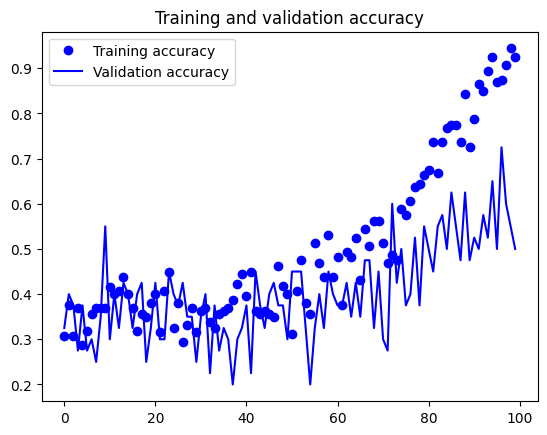

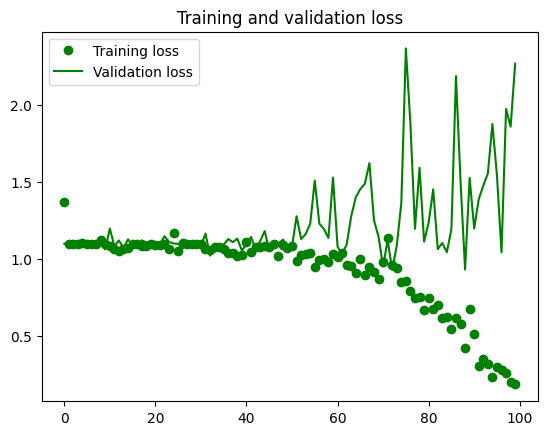

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

20/20 [==============================] - 31s 2s/step - loss: 1.0619 - accuracy: 0.7375
Test accuracy: 0.737500011920929
Test loss: 1.0618866682052612


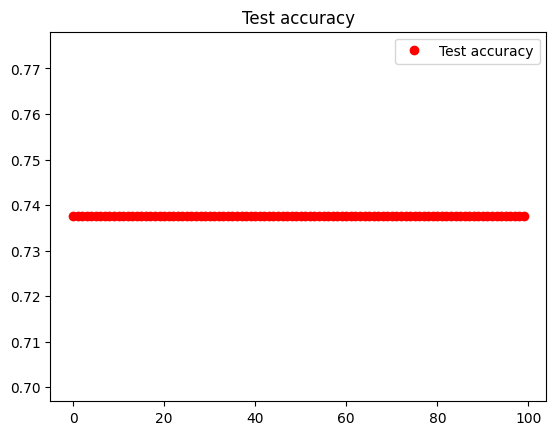

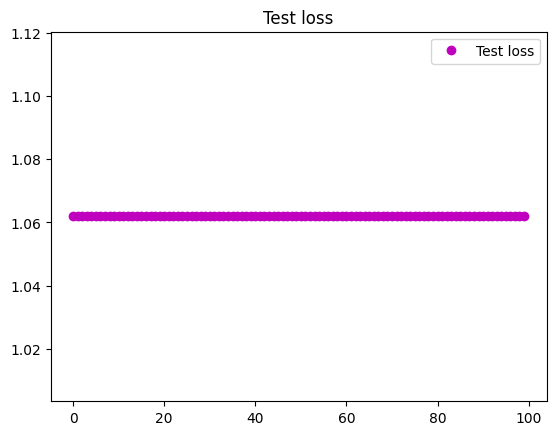

In [13]:
test_loss, test_acc = model.evaluate(test_generator, steps=20)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

plt.figure()

plt.plot(epochs, [test_acc]*len(epochs), 'ro', label='Test accuracy')
plt.title('Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, [test_loss]*len(epochs), 'mo', label='Test loss')
plt.title('Test loss')
plt.legend()

plt.show()

### 2. 1차 모델의 문제점 및 개선 방안

#### 2.1 모델의 문제점

- Training & Validation Accuracy 그래프에서,   
Training accracy는 높으나 Validation accuracy는 낮은 경향을 보임   
   
- Training & Validation Loss 그래프에서,   
Training loss는 낮으나 Validation loss는 높은 경향을 보임   

    
**따라서**   
모델이 Training Data에 과적합 되었음을 알 수 있다.

결국 Test Accuracy 그래프와 Test Loss 그래프에서 볼 수 있듯,    
모델 성능이 매우 좋지 않았다.

#### 2.2 개선 방안

일반적으로 과적합 상황에서 CNN 모델을 개선할 수 있는 방안은 다음과 같다.
1. 학습 데이터 양 증대 및 전처리 개선
2. 모델의 복잡도 조정 혹은 전이 학습
3. 정규화 기법 사용(드롭아웃, 배치 정규화 등)
4. 하이퍼파라미터 조정
5. Loss Function과 Optimizer 변경
6. 앙상블

### 3. 개선과정(1) - 데이터 증강 및 전이 학습